# Certificate in AI 2.0: Machine Learning
# Lab 02: Multiple Linear Regression

## Introduction

In this lab, we'll build on the fundamentals of linear regression that we covered in Lab 01. Instead of implementing the algorithms from scratch, we'll use scikit-learn (sklearn) to focus on the concepts of multiple linear regression, feature scaling, and model evaluation.

We'll work with a real-world dataset called Auto MPG, which contains information about various cars and their fuel efficiency.

## Part 1: Basic Setup and Data Loading

First, let's import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

Now, let's load and explore the Auto MPG dataset:

In [3]:
# Load the data
df = pd.read_csv('autompg.csv')

In [4]:
# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [5]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [5]:
# Summary statistics
print("\nSummary statistics:")
df.describe()


Summary statistics:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.130653,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.314528,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model-year      0
dtype: int64


Let's visualize the relationships between features and the target (mpg):

<Figure size 1200x800 with 0 Axes>

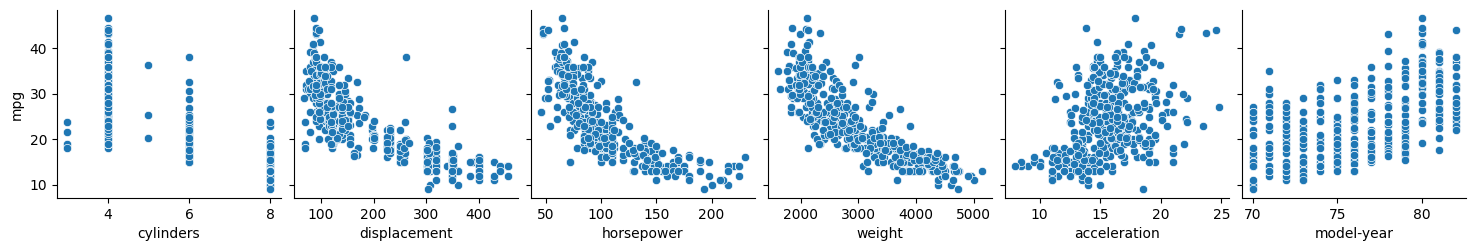

In [8]:
# Create a pair plot to see relationships between features
plt.figure(figsize=(12, 8))
sns.pairplot(df, x_vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year'], 
             y_vars=['mpg'])
plt.show()

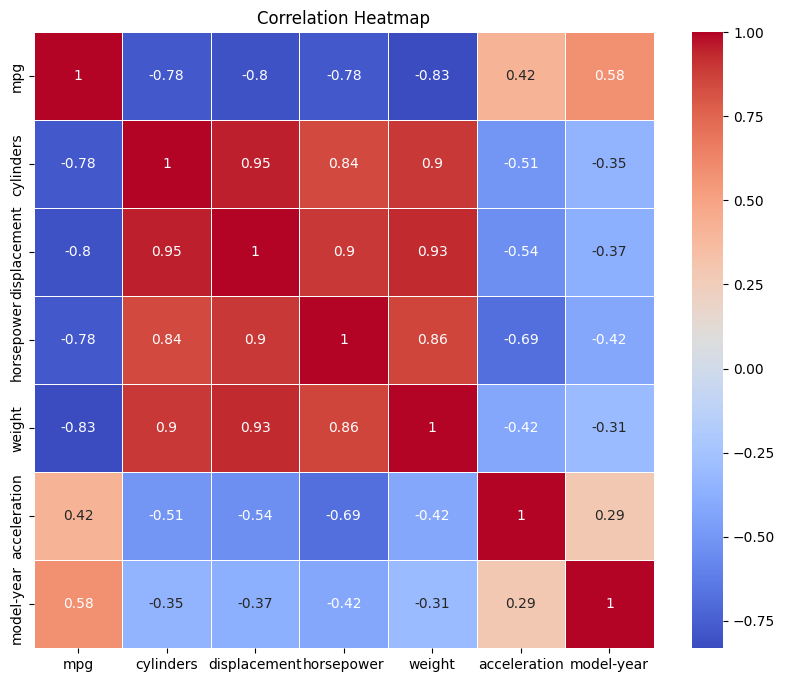

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Part 2: Simple Linear Regression with sklearn

Before diving into multiple regression, let's quickly implement a simple linear regression using sklearn to see how it compares to our implementation from Lab 01. We'll use 'weight' as our single feature since it has a strong correlation with 'mpg'.

In [10]:
# Extract feature and target
X_simple = df[['weight']].values
y = df['mpg'].values

In [11]:
# Split the data into training and testing sets
X_simple_train, X_simple_test, y_train, y_test = train_test_split(X_simple,y,test_size=0.2,random_state=42)

In [12]:
# Create and train the model
simple_model = LinearRegression()
simple_model.fit(X_simple_train,y_train)

LinearRegression()

In [13]:
# Make predictions
y_simple_train_pred = simple_model.predict(X_simple_train)
y_simple_test_pred = simple_model.predict(X_simple_test)

In [14]:
# Calculate metrics
simple_train_mse = mean_squared_error(y_train,y_simple_train_pred)
simple_test_mse = mean_squared_error(y_test,y_simple_test_pred)

print(f"Simple Linear Regression Results:")
print(f"Intercept: {simple_model.intercept_:.4f}")
print(f"Coefficient (weight): {simple_model.coef_[0]:.6f}")
print(f"Training MSE: {simple_train_mse:.4f}")
print(f"Test MSE: {simple_test_mse:.4f}")



Simple Linear Regression Results:
Intercept: 46.7821
Coefficient (weight): -0.007805
Training MSE: 19.7819
Test MSE: 14.8949


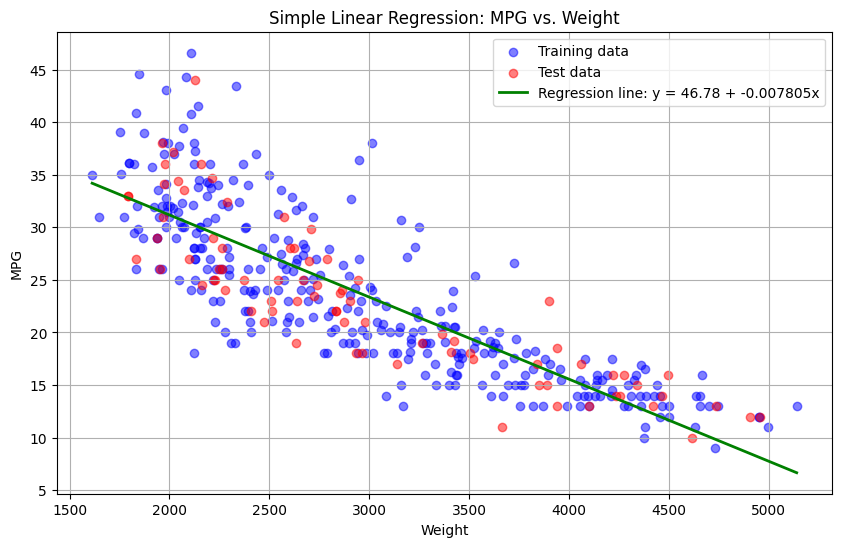

In [15]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_simple_train, y_train, color='blue', alpha=0.5, label='Training data')
plt.scatter(X_simple_test, y_test, color='red', alpha=0.5, label='Test data')
# Plot the regression line
x_line = np.array([min(X_simple[:, 0]), max(X_simple[:, 0])]).reshape(-1, 1)
y_line = simple_model.predict(x_line)
plt.plot(x_line, y_line, 'g-', linewidth=2, label=f'Regression line: y = {simple_model.intercept_:.2f} + {simple_model.coef_[0]:.6f}x')

plt.title('Simple Linear Regression: MPG vs. Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show()


The model gives us a linear equation of the form:

$\text{mpg} = b_0 + b_1 \times \text{weight}$

## Part 3: Multiple Linear Regression

Now, let's build a multiple linear regression model using all the features:

In [16]:
# Extract features and target
X_multi = df[['cylinders','displacement','horsepower','weight','acceleration','model-year']].values
y = df['mpg'].values

In [17]:
# X_multi_train, X_multi_test, y_train, y_test = train_test_split(df.drop('mpg' , axis = 1) , df['mpg'])

In [18]:
# Split the data
X_multi_train, X_multi_test, y_train, y_test = train_test_split(X_multi,y,test_size=0.2,random_state=42)


In [19]:
# Create and train the model
multi_model = LinearRegression()
multi_model.fit(X_multi_train,y_train)

LinearRegression()

In [20]:
# Make predictions
y_multi_train_pred = multi_model.predict(X_multi_train)
y_multi_test_pred = multi_model.predict(X_multi_test)


In [21]:
# Calculate metrics
multi_train_mse = mean_squared_error(y_train,y_multi_train_pred)
multi_test_mse = mean_squared_error(y_test,y_multi_test_pred)
multi_train_r2 = r2_score(y_train,y_multi_train_pred)
multi_test_r2 = r2_score(y_test,y_multi_test_pred)


print(f"Multiple Linear Regression Results:")
print(f"Intercept: {multi_model.intercept_:.4f}")
print("Coefficients:")
feature_names = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year']
for name, coef in zip(feature_names, multi_model.coef_):
    print(f"  {name}: {coef:.6f}")
print(f"Training MSE: {multi_train_mse:.4f}")
print(f"Test MSE: {multi_test_mse:.4f}")
print(f"Training r2: {multi_train_r2:.4f}")
print(f"Test r2: {multi_test_r2:.4f}")


Multiple Linear Regression Results:
Intercept: -18.2550
Coefficients:
  cylinders: 0.063368
  displacement: 0.001910
  horsepower: 0.000265
  weight: -0.006988
  acceleration: 0.068544
  model-year: 0.798911
Training MSE: 12.2962
Test MSE: 9.4423
Training r2: 0.8039
Test r2: 0.8244


## Part 4: Feature Scaling

One important aspect of multiple linear regression that we need to consider is the scale of the features. Features with larger scales can dominate the model's learning process. Let's implement feature scaling:

In [22]:
# Create a scaler
scaler = StandardScaler()

In [23]:
# Fit the scaler on the training data and transform both training and test data
X_multi_train_scaled = scaler.fit_transform(X_multi_train)
X_multi_test_scaled = scaler.fit_transform(X_multi_test)

In [24]:
# Create and train the model on scaled data
multi_model_scaled = LinearRegression()
multi_model_scaled.fit(X_multi_train_scaled,y_train)


LinearRegression()

In [25]:
# Make predictions
y_multi_train_pred_scaled = multi_model_scaled.predict(X_multi_train_scaled)
y_multi_test_pred_scaled = multi_model_scaled.predict(X_multi_test_scaled)

In [26]:
# Calculate metrics
multi_train_mse_scaled = mean_squared_error(y_train,y_multi_train_pred_scaled)
multi_test_mse_scaled = mean_squared_error(y_test,y_multi_test_pred_scaled)

multi_train_scaled_r2 = r2_score(y_multi_train_pred,y_multi_train_pred_scaled)
multi_test_scaled_r2 = r2_score(y_multi_test_pred,y_multi_test_pred_scaled)

print(f"Multiple Linear Regression Results (with Feature Scaling):")
print(f"Intercept: {multi_model_scaled.intercept_:.4f}")
print("Coefficients (scaled features):")
for name, coef in zip(feature_names, multi_model_scaled.coef_):
    print(f"  {name}: {coef:.6f}")
print(f"Training MSE: {multi_train_mse_scaled:.4f}")
print(f"Test MSE: {multi_test_mse_scaled:.4f}")

print(f"Training r2 Score: {multi_train_scaled_r2:.4f}")
print(f"Test r2 Score: {multi_test_scaled_r2:.4f}")

Multiple Linear Regression Results (with Feature Scaling):
Intercept: 23.6082
Coefficients (scaled features):
  cylinders: 0.106603
  displacement: 0.196353
  horsepower: 0.009832
  weight: -5.864809
  acceleration: 0.189108
  model-year: 2.874090
Training MSE: 12.2962
Test MSE: 9.0740
Training r2 Score: 1.0000
Test r2 Score: 0.9932


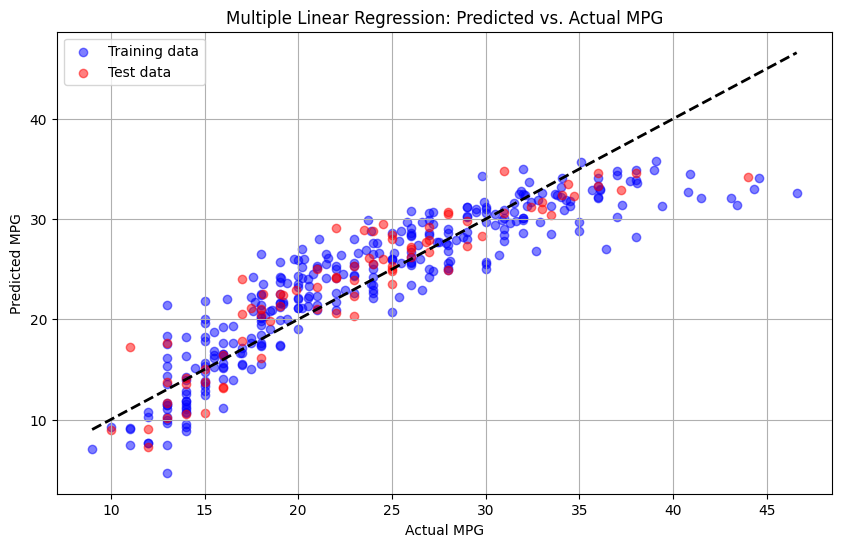

In [27]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_multi_train_pred_scaled, color='blue', alpha=0.5, label='Training data')
plt.scatter(y_test, y_multi_test_pred_scaled, color='red', alpha=0.5, label='Test data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=2)
plt.title('Multiple Linear Regression: Predicted vs. Actual MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.legend()
plt.grid(True)
plt.show()

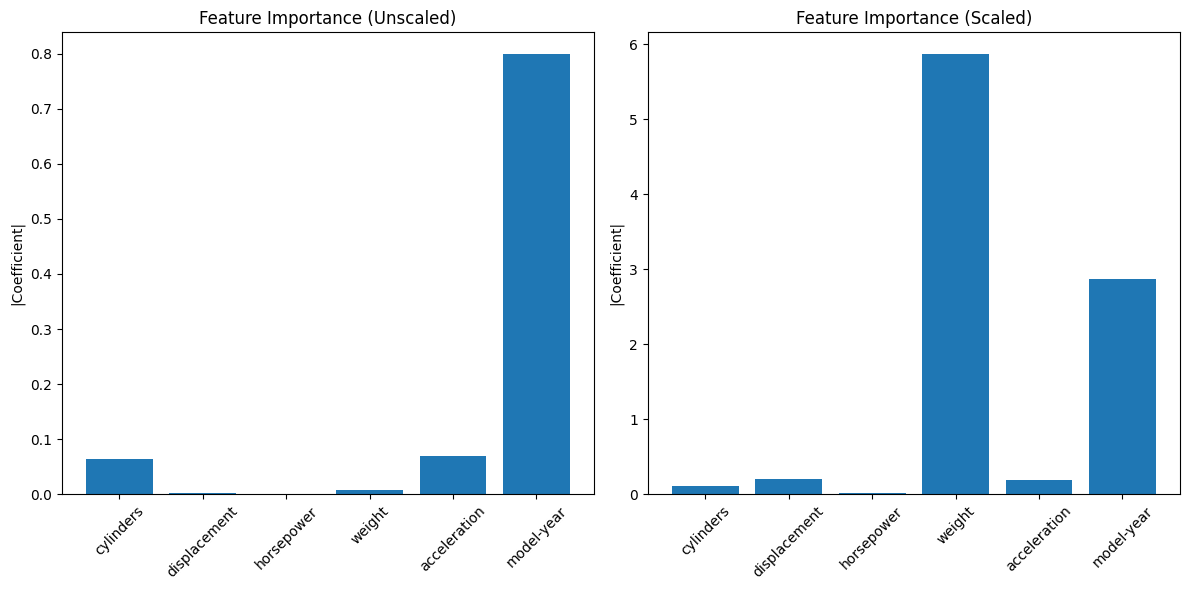

In [28]:
# Compare feature importance before and after scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(feature_names, np.abs(multi_model.coef_))
plt.title('Feature Importance (Unscaled)')
plt.xticks(rotation=45)
plt.ylabel('|Coefficient|')

plt.subplot(1, 2, 2)
plt.bar(feature_names, np.abs(multi_model_scaled.coef_))
plt.title('Feature Importance (Scaled)')
plt.xticks(rotation=45)
plt.ylabel('|Coefficient|')

plt.tight_layout()
plt.show()

# Assignment 2

Train a multiple linear regression model on the Fish Weight prediction data 